# Flyback Converter Design
![Schematic](resources/schmatic.png)

# Imports and Settings

In [1]:
from resources.FlybackSimulation import FlybackSimulation, Snubber
from matplotlib import pyplot as plt
from numpy import sqrt


# Plot settings
PLOT_FOREGROUND_COLORS = 'white'
PLOT_BACKGROUND_COLOR = '#272822'   # pyplot background color (#272822 matches VS Code's monokai theme)
plt.rcParams['axes.facecolor']      = PLOT_BACKGROUND_COLOR 
plt.rcParams['xtick.color']         = PLOT_FOREGROUND_COLORS
plt.rcParams['ytick.color']         = PLOT_FOREGROUND_COLORS
plt.rcParams['axes.edgecolor']      = PLOT_FOREGROUND_COLORS
plt.rcParams['axes.labelcolor']     = PLOT_FOREGROUND_COLORS
plt.rcParams['legend.labelcolor']   = PLOT_FOREGROUND_COLORS

# Input parameters

In [48]:
Vi = 311        # Input voltage
Vo = 48         # Output voltage
Vdiode = 0.9    # Voltage drop on diode (for calculations only)
I1peak = 10     # 
Vdsmax = 600    # Maximum Voltage on the switch (disconsidering snubber)
Lm = 150e-6      # Magnetizing inductance (= k * sqrt(L1*L2))
Po = 300        # Output power 
OpMode = "DCM"  # Operation mode
# KFR = 1         # Ripple factor  1
Dmax = 0.5      # Maximum duty cycle (Buck-like if 0<=D<=0.5 and Boost-like if D>=0.5)
fs = 160e3      # Switching frequency  160kHz
eff = 0.8       # Estimated efficiency (η)  80%

# Derived values (do not edit)

In [49]:
Nmax=(Vdsmax-Vi)/(Vo+Vdiode); print(f"{Nmax=}")  # N = n1/n2
Rload = Vo**2/Po
Ts=1/fs
# Lmax=Vi*Dmax**2/(fs*I1peak); print(f"{Lmax=:.3}")
# 


Nmax=5.91002044989775


# Chosen values

In [50]:
N = 10
# Lm = 50e-6

simulation_time = 300e-6


# Final values (do not edit)

In [51]:
D = (1/Vi) * sqrt(2*Lm*fs*Po); print(f"{D=}")
Co = 100e-6

D=0.3858520900321543


In [52]:
simulation = FlybackSimulation()
snubber = Snubber(R=100, C=1e-9)
simulation.generate_flyback_netlist(_Vin=Vi, _Vout=Vo, _N=N, _D=D, _Lm=Lm, 
_Rl=Rload, _fs=fs, _Co=Co, _snubber=snubber, _endtime=simulation_time)
simulation.begin()
simulation.read_outputs()

Calling Ngspice for generated netlist...

ngspice compiled from ngspice revision 31
Written originally by Berkeley University
Currently maintained by the NGSpice Project

Copyright (C) 1985-1996,  The Regents of the University of California
Copyright (C) 1999-2011,  The NGSpice Project
Available waveforms: ['t', 'Vds', 'Vout', 'Ip', 'Is']


Text(0, 0.5, 'Vds (V)')

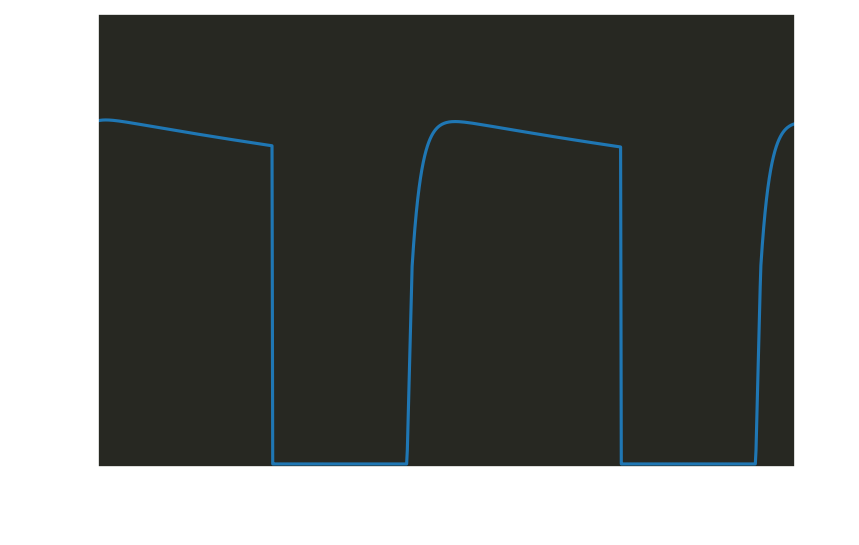

In [53]:
plt.figure(dpi=150)
simulation.plot(); plt.ylim(-5, Vdsmax*1.2)
plt.xlim(simulation_time-2/fs, simulation_time); plt.xlabel("time (s)"); plt.ylabel("Vds (V)")


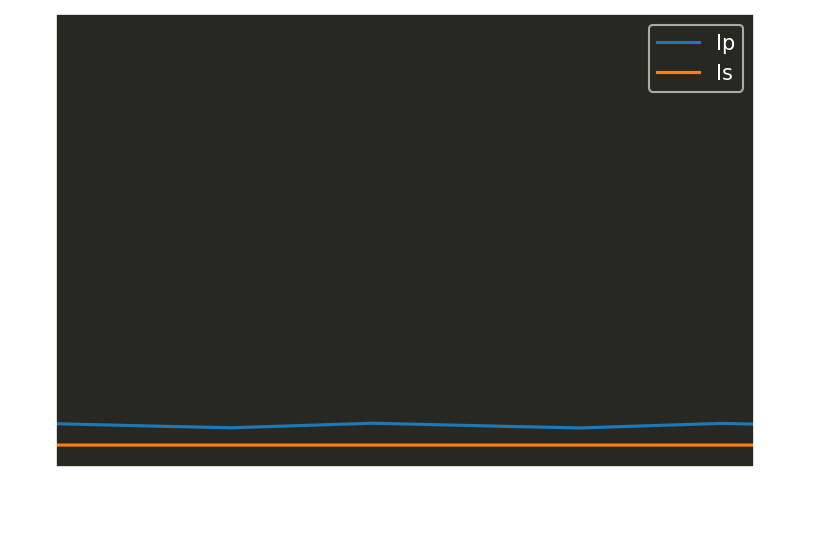

In [54]:
plt.figure(dpi=150)
simulation.plot(y="Ip") # 
# plt.plot(simulation.df["t"], 10*simulation.df["Ip"])
simulation.plot(y="Is")
plt.xlim(simulation_time-2/fs, simulation_time); #plt.ylim(0, 10); 
plt.legend(["Ip", "Is"]); plt.xlabel("time (s)");

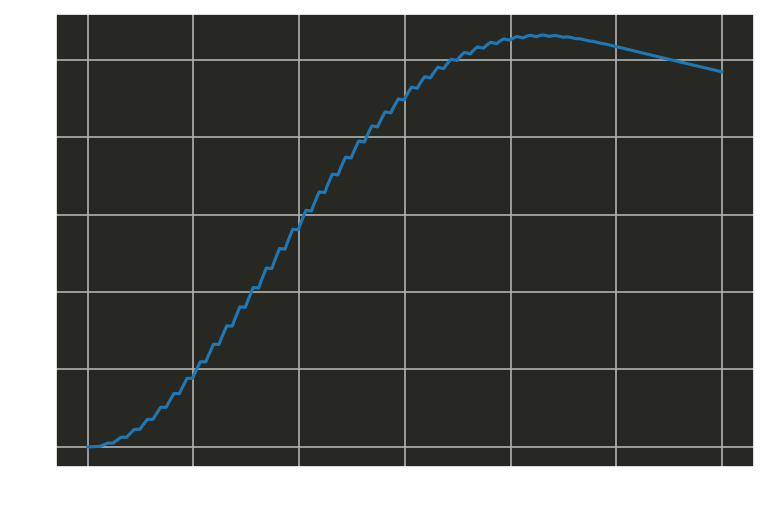

In [55]:
plt.figure(dpi=150);
simulation.plot(y="Vout");
plt.grid(True)
# plt.xlim(290e-6, 300e-6); plt.ylim(-10, 300); plt.legend(["Ip", "Is"]); plt.xlabel("time (s)");

# References
https://www.monolithicpower.com/en/how-to-design-a-flyback-converter-in-seven-steps